In [4]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df_train= pd.read_csv('//content/twitter_training.csv')
df_test= pd.read_csv('//content/twitter_validation.csv')

In [6]:
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46294 entries, 0 to 46293
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   46294 non-null  int64 
 1   Borderlands                                            46294 non-null  object
 2   Positive                                               46294 non-null  object
 3   im getting on borderlands and i will murder you all ,  45849 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
df_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [10]:
df_train.rename(columns={'im getting on borderlands and i will murder you all ,': 'text'}, inplace=True)
df_test.rename(columns={'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'}, inplace=True)

In [11]:
df_train.rename(columns={'Positive': 'sentiment'}, inplace=True)
df_test.rename(columns={'Irrelevant': 'sentiment'}, inplace=True)

In [12]:
df=pd.DataFrame()
df['text']=df_train['text']
df['sentiment']=df_train['sentiment']
df

,text,sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive
...,...,...
46289,The last 3 August’s I have broken my phone. Th...,Neutral
46290,The last 3 August's I've broken my phone. This...,Neutral
46291,The last time I broke my phone was on August 3...,Neutral
46292,The last 3 August’s I have broken my phone. Th...,Neutral


In [13]:
df.isnull().sum()

text         445
sentiment      0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
sentiment_label = df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype='object'))

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweet = df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           789952    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 806603 (3.08 MB)
Trainable params: 806603 (3.08 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [18]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=2, batch_size=256)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


144/144 [==============================] - 122s 805ms/step - loss: 0.0000e+00 - accuracy: 0.2574 - val_loss: 0.0000e+00 - val_accuracy: 0.2072
Epoch 2/2
144/144 [==============================] - 108s 754ms/step - loss: 0.0000e+00 - accuracy: 0.2574 - val_loss: 0.0000e+00 - val_accuracy: 0.2072


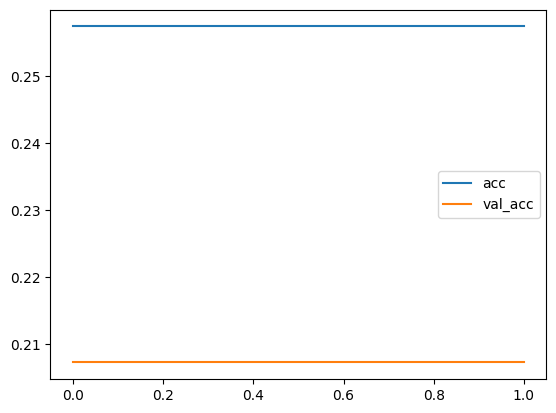

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

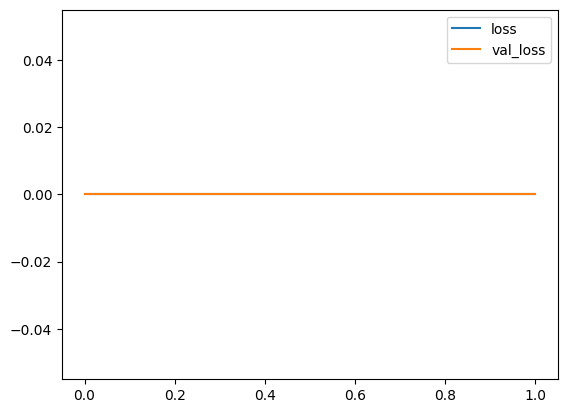

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [21]:
df['text']=df_test["text"]
df['sentiment']=df_test['sentiment']

In [22]:
df.isnull().sum()

text         44854
sentiment    44854
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
sentiment_label = df.sentiment.factorize()

In [25]:
tweet = df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
ypred=model.predict(padded_sequence)

32/32 [==============================] - 2s 56ms/step


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(sentiment_label[0],ypred)
import seaborn as sns

<Axes: >

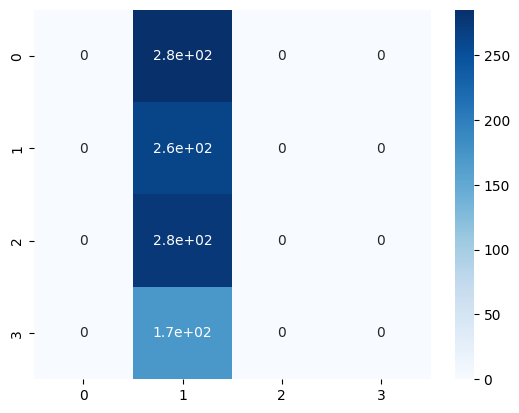

In [27]:
sns.heatmap(cm,annot=True,cmap='Blues')